# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import dataset

In [2]:
dt = pd.read_csv(r'C:\Users\Harsh\OneDrive\Desktop\hotel_booking.csv', encoding='ISO-8859-1')

# exploratory data analysis and data cleaning

In [3]:
dt.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [4]:
dt.shape

(119390, 36)

In [5]:
dt.drop(["name", "email", "phone-number", "credit_card"], axis=1, inplace=True)

In [6]:
dt.shape

(119390, 32)

In [7]:
dt.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
dt["reservation_status_date"] = pd.to_datetime(dt["reservation_status_date"])

In [10]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [11]:
df=dt.describe(include = "object")

In [12]:
for col in df.columns:
    print(col)
    print(dt[col].unique)
    print("-"*50)

hotel
<bound method Series.unique of 0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object>
--------------------------------------------------
arrival_date_month
<bound method Series.unique of 0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119390, dtype: object>
--------------------------------------------------
meal
<bound method Series.unique of 0         BB
1         BB
2         BB
3         BB
4         BB
          ..
119385    BB
119386    BB
119387    BB
119388    BB
119389    HB
Name: meal, Length: 119390, dtype: object>
------------------------------------------------

In [13]:
 print(dt[col].unique)

<bound method Series.unique of 0         Check-Out
1         Check-Out
2         Check-Out
3         Check-Out
4         Check-Out
            ...    
119385    Check-Out
119386    Check-Out
119387    Check-Out
119388    Check-Out
119389    Check-Out
Name: reservation_status, Length: 119390, dtype: object>


In [14]:
dt.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
dt.drop(["agent","company"],axis = 1,inplace=True)

In [16]:
dt.dropna(inplace = True)

In [17]:
dt.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


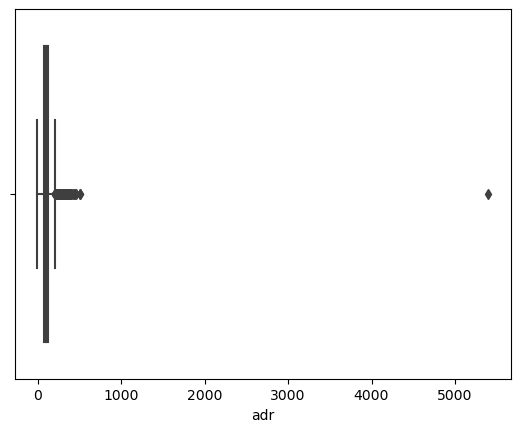

In [18]:
sns.boxplot(x="adr",data=dt)
plt.show()

In [19]:
q1 = dt["adr"].quantile(0.25)

In [20]:
q3= dt["adr"].quantile(0.75)

In [21]:
IQR = q3-q1

In [22]:
max_range = q3 + (1.5*IQR)

In [23]:
max_range

210.0

In [24]:
data = dt[dt["adr"]<max_range]

In [25]:
data.shape

(114892, 30)

In [26]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892.000000,114892
mean,0.370766,105.429995,2016.145458,27.042614,15.774397,0.921970,2.482984,1.847230,0.082277,0.007485,0.032674,0.089989,0.135492,0.216891,2.402291,96.986301,0.058960,0.561110,2016-07-24 15:55:07.718553088
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,2016-01-28 00:00:00
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.170000,0.000000,0.000000,2016-07-30 00:00:00
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,0.000000,1.000000,2017-02-02 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,209.860000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483012,107.783421,0.706809,13.746840,8.782986,0.995282,1.897743,0.578417,0.348943,0.095031,0.177783,0.860239,1.509645,0.647524,17.917563,40.273695,0.238816,0.784497,NaN


# Data Analysis and Visualization

In [27]:
cancelled_perc = data["is_canceled"].value_counts(normalize = True)*100
cancelled_perc

is_canceled
0    62.923441
1    37.076559
Name: proportion, dtype: float64

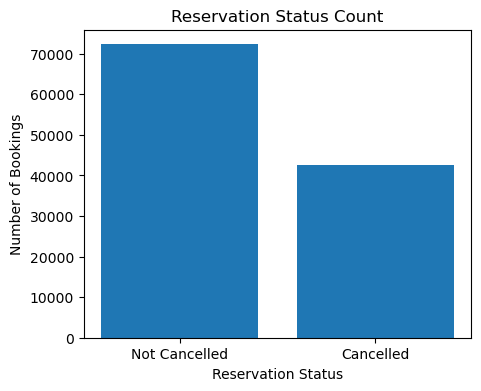

In [28]:
counts = data["is_canceled"].value_counts()


labels = ["Not Cancelled", "Cancelled"]


plt.figure(figsize=(5, 4))
plt.title("Reservation Status Count")
plt.bar(labels, counts)
plt.xlabel("Reservation Status")
plt.ylabel("Number of Bookings")
plt.show()


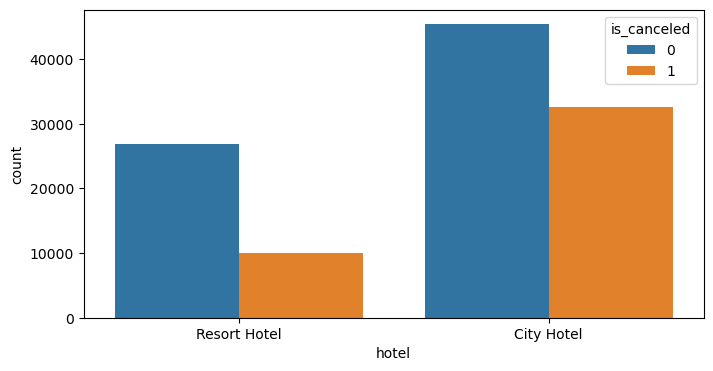

In [29]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x="hotel",hue="is_canceled",data = data)
plt.show()

In [30]:
Resort_hotel = data[data["hotel"]=="Resort Hotel"]
Resort_hotel["is_canceled"].value_counts(normalize = True)*100

is_canceled
0    72.81577
1    27.18423
Name: proportion, dtype: float64

In [36]:
City_hotel = data[data["hotel"]=="City Hotel"]
City_hotel["is_canceled"].value_counts(normalize=True) * 100

is_canceled
0    58.227978
1    41.772022
Name: proportion, dtype: float64

In [40]:
Resort_hotel = Resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
Resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [41]:
City_hotel = City_hotel.groupby("reservation_status_date")[["adr"]].mean()
City_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,135.298571
2017-09-04,110.932400
2017-09-05,154.000000


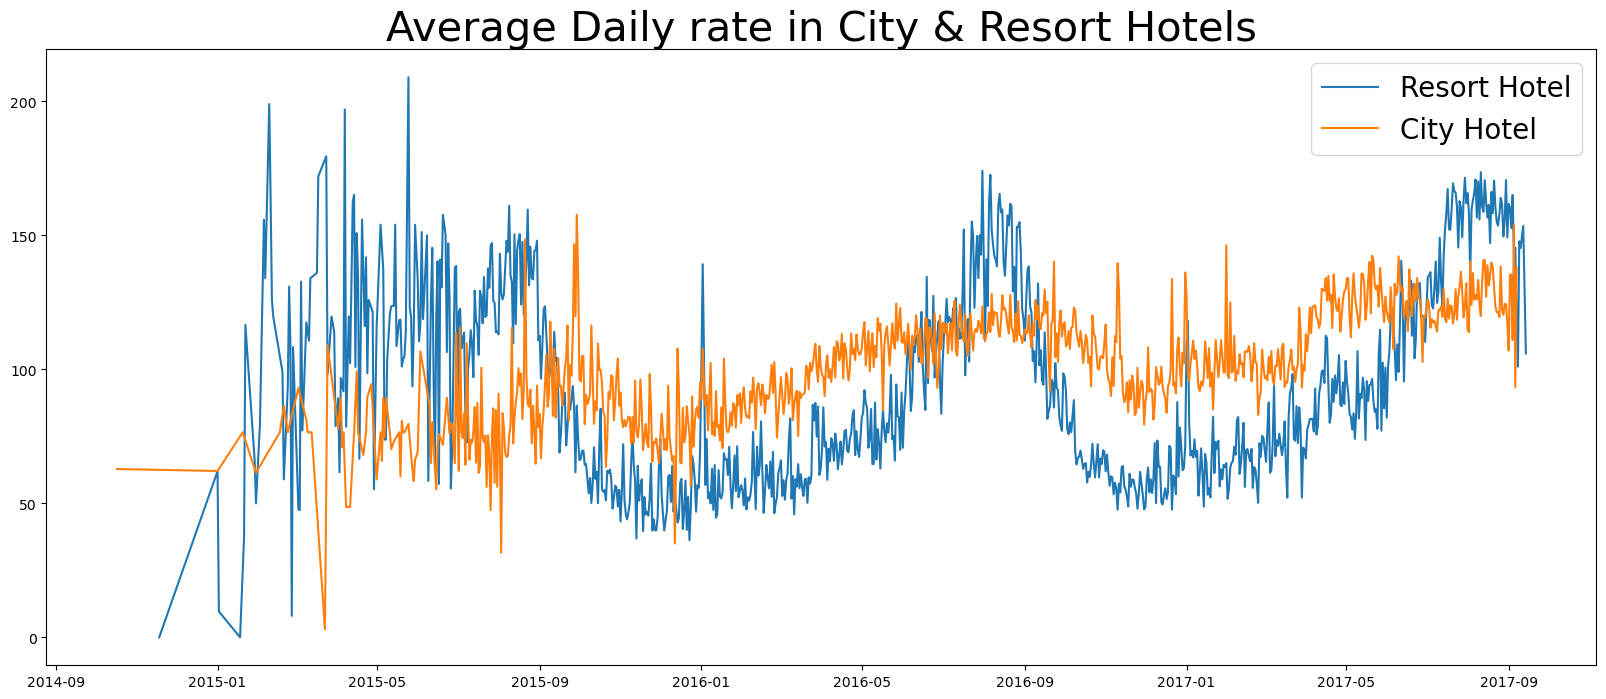

In [45]:
plt.figure(figsize=(20,8))
plt.title("Average Daily rate in City & Resort Hotels" , fontsize = 30)
plt.plot(Resort_hotel.index,Resort_hotel["adr"],label = "Resort Hotel")
plt.plot(City_hotel.index,City_hotel["adr"],label = "City Hotel")
plt.legend(fontsize=20)
plt.show()

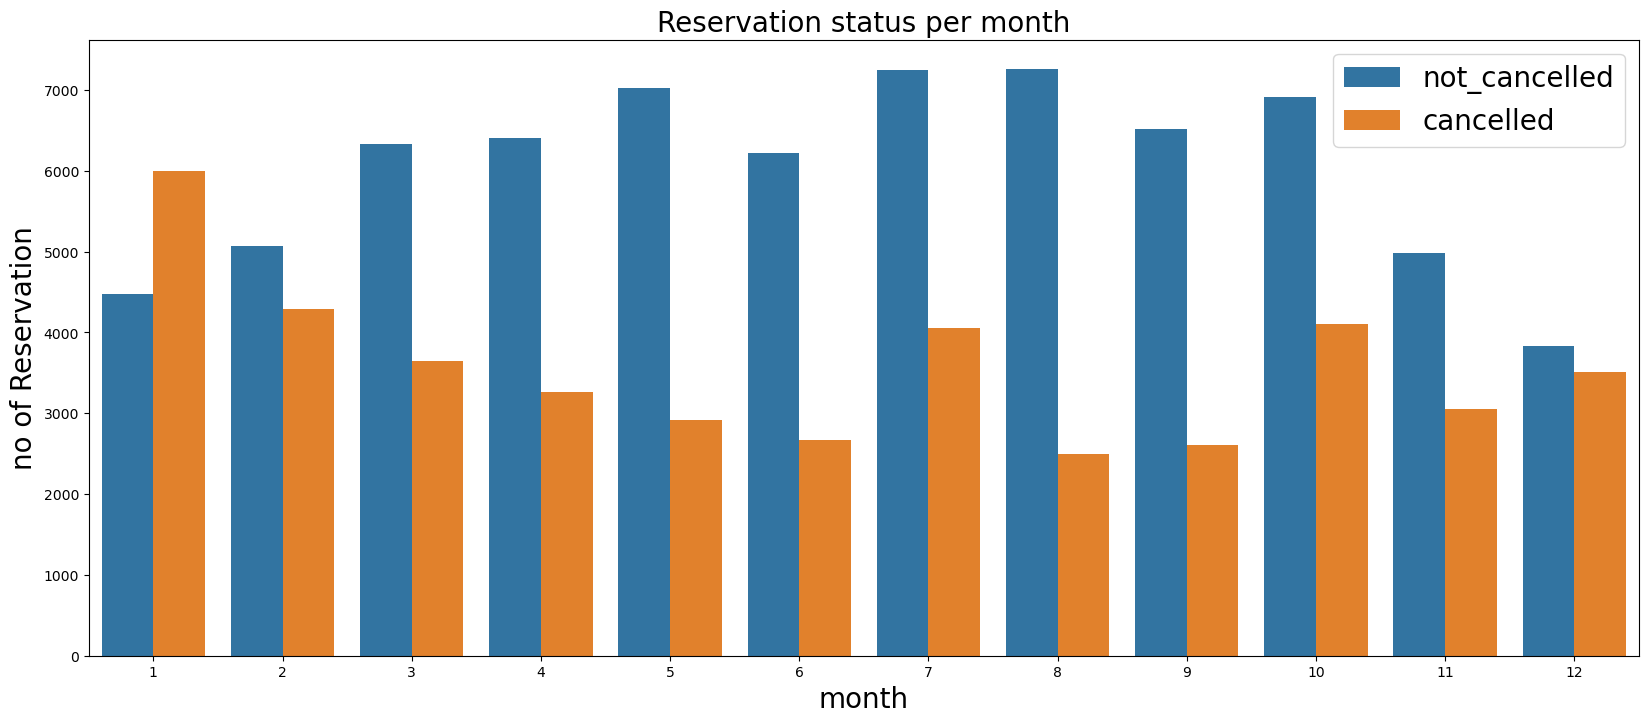

In [56]:
data["month"]= data["reservation_status_date"].dt.month
plt.figure(figsize=(20,8))
ax1 = sns.countplot(x = 'month' ,hue="is_canceled", data = data)
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation status per month",size=20)
plt.xlabel('month',fontsize=20)
plt.ylabel("no of Reservation",fontsize=20)
plt.legend(["not_cancelled","cancelled"],fontsize=20)
plt.show()

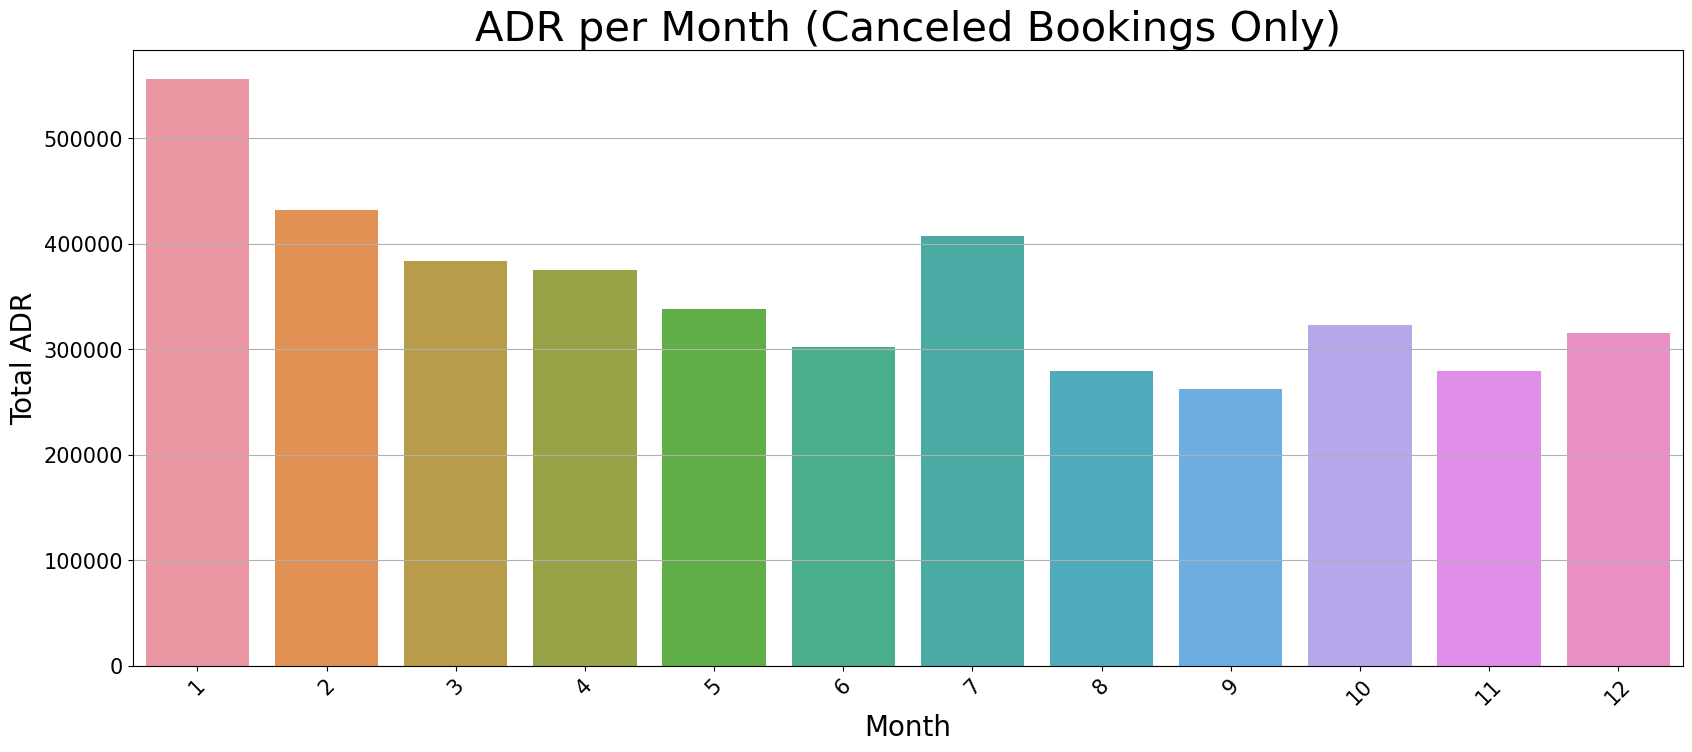

In [60]:
plt.figure(figsize=(20, 8))
plt.title("ADR per Month (Canceled Bookings Only)", fontsize=30)

# Group by and prepare data
monthly_adr = data[data["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index()

# Plot
sns.barplot(x="month", y="adr", data=monthly_adr)

plt.xlabel("Month", fontsize=20)
plt.ylabel("Total ADR", fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis='y')
plt.show()


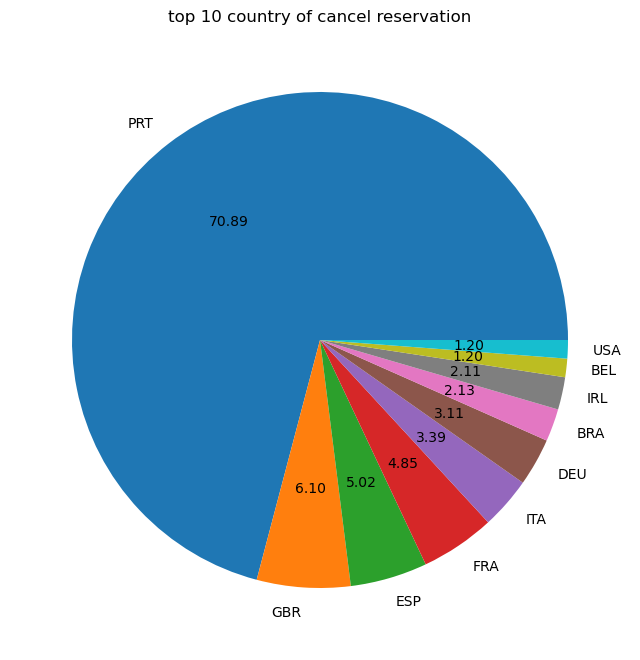

In [66]:
cancelled_data = data[data["is_canceled"]==1]
top10_country = cancelled_data["country"].value_counts().head(10)
plt.figure(figsize=(8,9))
plt.title("top 10 country of cancel reservation")
plt.pie(top10_country,autopct="%.2f",labels=top10_country.index)
plt.show()

In [67]:
data["market_segment"].value_counts()

market_segment
Online TA        53534
Offline TA/TO    24052
Groups           19709
Direct           11522
Corporate         5104
Complementary      734
Aviation           237
Name: count, dtype: int64

In [69]:
data["market_segment"].value_counts(normalize = True)*100

market_segment
Online TA        46.595063
Offline TA/TO    20.934443
Groups           17.154371
Direct           10.028549
Corporate         4.442433
Complementary     0.638861
Aviation          0.206281
Name: proportion, dtype: float64

In [70]:
cancelled_data["market_segment"].value_counts(normalize = True)*100

market_segment
Online TA        45.607775
Groups           28.308841
Offline TA/TO    19.385887
Direct            4.072961
Corporate         2.291187
Complementary     0.211278
Aviation          0.122071
Name: proportion, dtype: float64

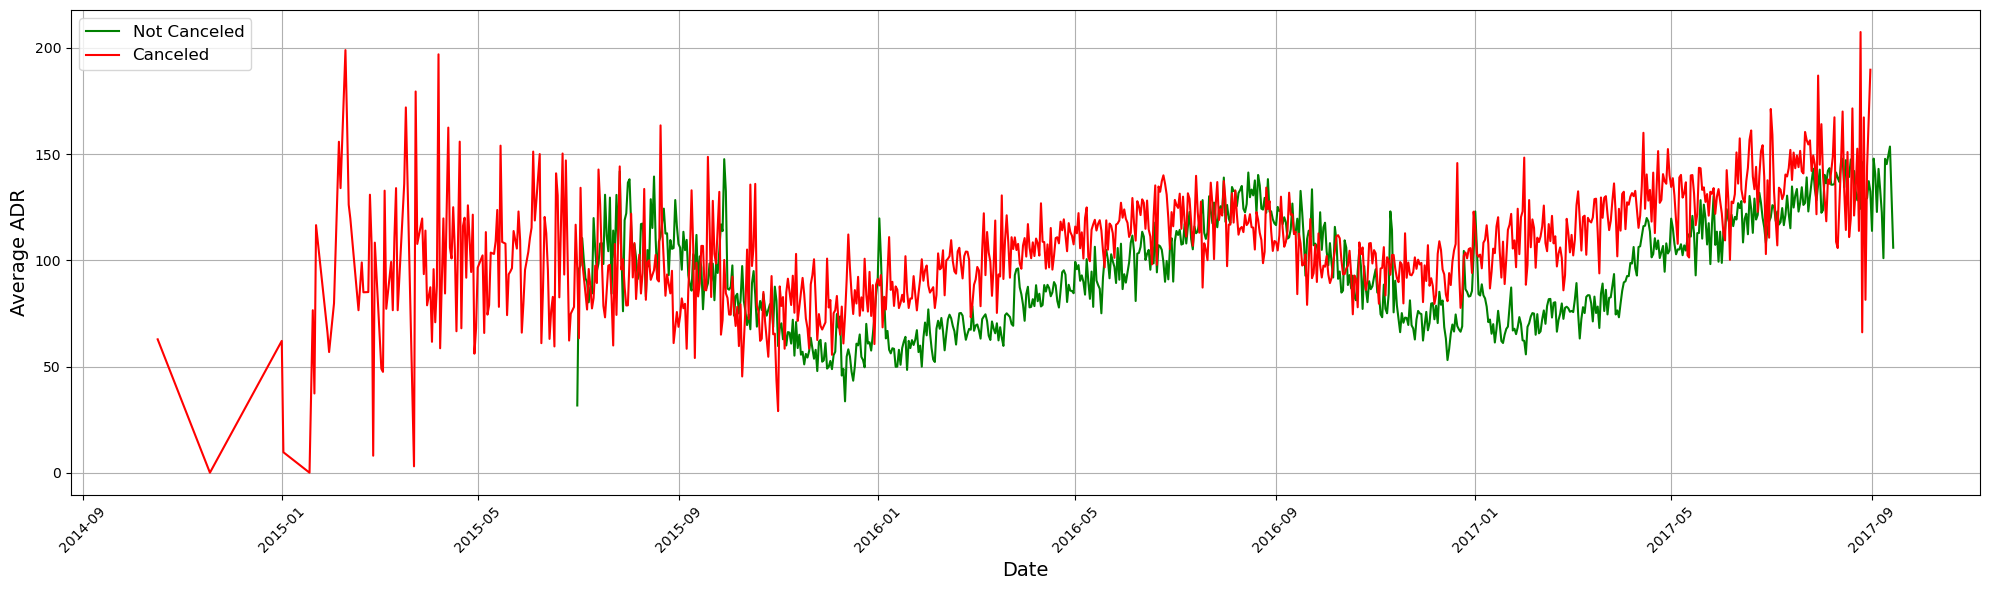

In [80]:
cancelled_data_adr = cancelled_data.groupby("reservation_status_date")[["adr"]].mean()
cancelled_data_adr.reset_index(inplace = True)
cancelled_data_adr.sort_values("reservation_status_date",inplace= True)


not_cancel_data = data[data["is_canceled"]==0]
not_cancel_data_adr = not_cancel_data.groupby("reservation_status_date")[["adr"]].mean()
not_cancel_data_adr.reset_index(inplace = True)
not_cancel_data_adr.sort_values("reservation_status_date",inplace= True)

plt.figure(figsize=(20, 6))

plt.plot(not_cancel_data_adr["reservation_status_date"],
         not_cancel_data_adr["adr"],
         label="Not Canceled",
         color="green")


plt.plot(cancelled_data_adr["reservation_status_date"],
         cancelled_data_adr["adr"],
         label="Canceled",
         color="red")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average ADR", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [81]:
cancel_df_adr=cancelled_data_adr[(cancelled_data_adr["reservation_status_date"]>"2016") & (cancelled_data_adr["reservation_status_date"]<"2017-09" )]

In [82]:
not_cancel_data_adr=not_cancel_data_adr[(not_cancel_data_adr["reservation_status_date"]>"2016") & (not_cancel_data_adr["reservation_status_date"]<"2017-09" )]

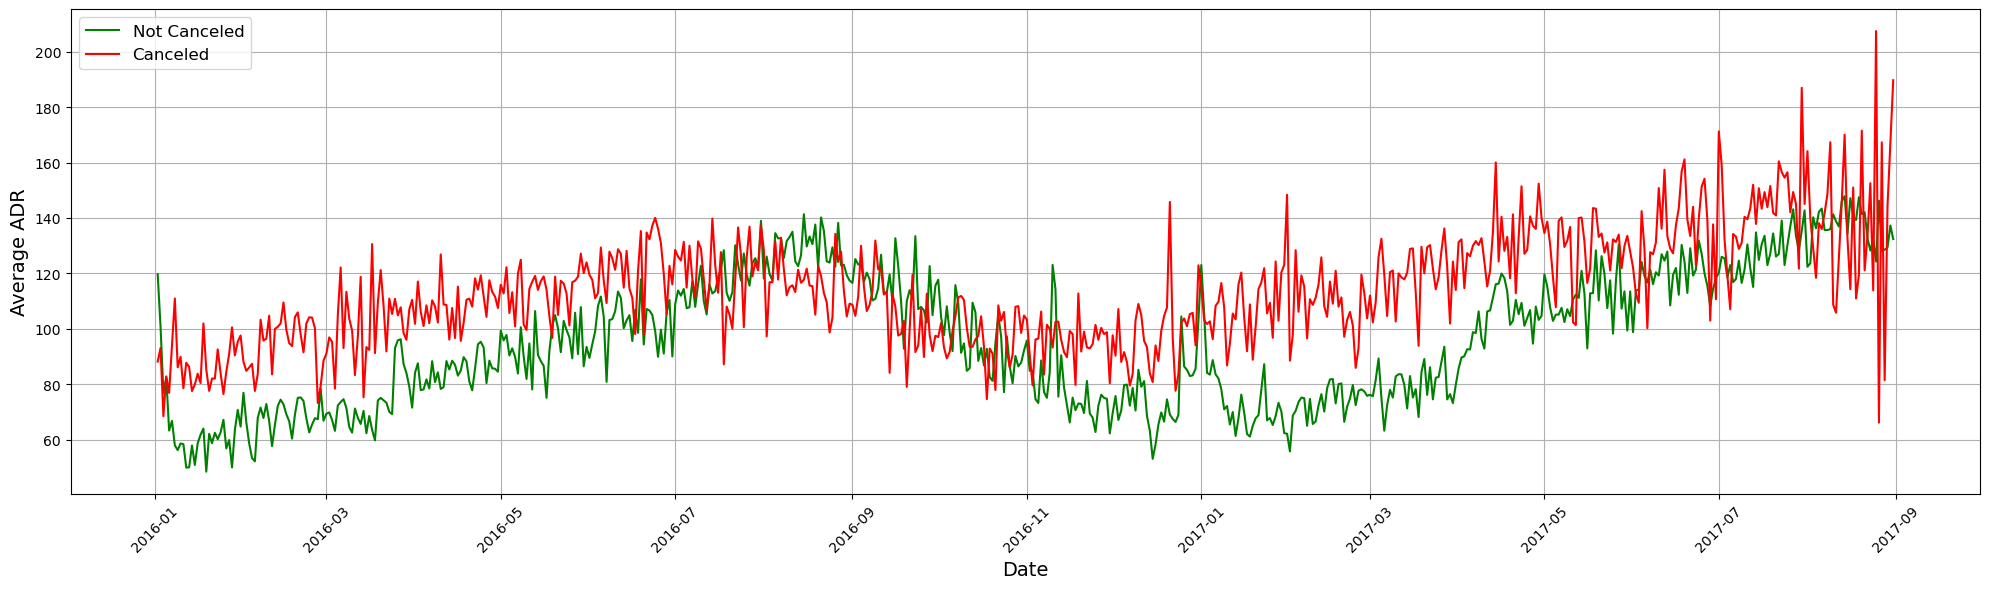

In [84]:
plt.figure(figsize=(20, 6))

plt.plot(not_cancel_data_adr["reservation_status_date"],
         not_cancel_data_adr["adr"],
         label="Not Canceled",
         color="green")


plt.plot(cancel_df_adr["reservation_status_date"],
         cancel_df_adr["adr"],
         label="Canceled",
         color="red")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Average ADR", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()